# Fraudulent Transaction Analysis - Data Exploration
This notebook explores a dataset of bank transactions to detect fraudulent behavior. The goal of this exploration is to:
1. Understand the data structure.
2. Identify missing values, outliers, and simple bivariate relationships between variables.
3. Create rules for flagging fraudulent transactions.
4. Delve deeper into univariate analysis
5. Prepare for model building.

1. Understand the data structure.

In [7]:
# Load libraries needed
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
# Load the raw data
data = pd.read_csv("C:/Users/leahl/OneDrive/Desktop/Data Analysis Projects/Bank_Transaction_Dataset_for_Fraud_Detection/Data/Raw/bank_transactions_data_2.csv")
# Inspect the first few rows of the dataset
print(data.head())
print(data.info())
# Check data types 
print(data.dtypes)

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81 

2. Identify missing values, outliers, and simple relationships between variables.

In [8]:
# Check for any null values in data
print(data.isnull().sum())
# Check for any duplicate values in data 
print(f"Duplicate Rows: {data.duplicated().sum()}")

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64
Duplicate Rows: 0


In [9]:
# Analyse target 'TransactionType' variable
print(data['TransactionType'].value_counts())

TransactionType
Debit     1944
Credit     568
Name: count, dtype: int64


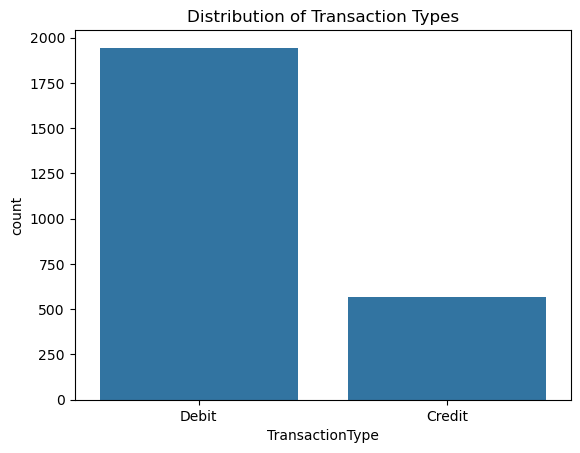

In [10]:
# Create barplot to explore distribution of Transaction Types
sns.countplot(x = 'TransactionType', data = data)
plt.title("Distribution of Transaction Types")
plt.show()

In [7]:
# Check data columns for any var. related to fraud transactions
print(data.columns)

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')


3. Create rules for fraudulent transactions.

In [11]:
# There are no columns related to Fraud, need to create fraud rule
# Version 1, Rule 1: Mark transactions above a certain threshold as fraudulent (1000)
# Version 1, Rule 2: Flag transactions with more than 3 login attempts as fraudulent
# Mark transactions as fraudulent if they satisfy ANY condition
data['fraud'] = (data['TransactionAmount'] > 1000) | (data['LoginAttempts'] > 3)
print(data['fraud'].value_counts())

fraud
False    2361
True      151
Name: count, dtype: int64


In [12]:
# Review rule to check if it makes sense - check thresholds. 
# Are they reasonable based on data distribution ?
print(data['TransactionAmount'].describe())
# Check mean, median and percentiles to see if 1000 is an outlier threshold vs. arbitrary
print(data['TransactionAmount'].quantile([0.25, 0.5, 0.75, 0.95, 0.99]))
# Check LoginAttempts distribution to see if the rule makes sense
print(data['LoginAttempts'].value_counts())

count    2512.000000
mean      297.593778
std       291.946243
min         0.260000
25%        81.885000
50%       211.140000
75%       414.527500
max      1919.110000
Name: TransactionAmount, dtype: float64
0.25      81.8850
0.50     211.1400
0.75     414.5275
0.95     878.1790
0.99    1360.5974
Name: TransactionAmount, dtype: float64
LoginAttempts
1    2390
5      32
4      32
3      31
2      27
Name: count, dtype: int64


In [13]:
# Now with additional info, introduce new rules
# Version 2, Rule 1
# Mark transactions above a certain threshold as fraudulent (878, above 75th percentile)
# Version 2, Rule 2 
# Mark transactions as fraud when LoginAttempts > 3 beceause it targets transac. with abnormally high attempts (4 & 5) which occur only 2.5% of time.
data['fraud'] = (data['TransactionAmount'] > 878) | (data['LoginAttempts'] > 3)
print(data['fraud'].value_counts())

fraud
False    2325
True      187
Name: count, dtype: int64


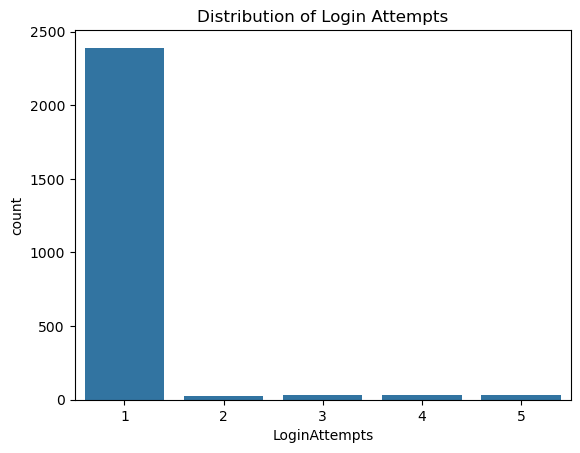

In [14]:
# Check if this LoginAttempt > 3 rule is accurate based on visual analysis 
sns.countplot(x = 'LoginAttempts', data = data) # Specify 'x' and 'data'
plt.title("Distribution of Login Attempts")
plt.show()

In [19]:
# Inspect transactions marked as fraudulent to further check rule accuracy
print(data[data['fraud'] == True].head(10))

    TransactionID AccountID  TransactionAmount      TransactionDate  \
26       TX000027   AC00441             246.93  2023-04-17 16:37:01   
74       TX000075   AC00265            1212.51  2023-10-04 16:36:29   
82       TX000083   AC00236             922.55  2023-01-23 16:32:48   
85       TX000086   AC00098            1340.19  2023-09-29 17:22:10   
91       TX000092   AC00310             223.85  2023-10-02 16:36:10   
110      TX000111   AC00068            1045.22  2023-11-22 16:13:39   
129      TX000130   AC00320            1036.66  2023-07-11 16:39:53   
138      TX000139   AC00405             997.43  2023-11-22 16:07:19   
141      TX000142   AC00114            1049.92  2023-10-23 16:50:33   
146      TX000147   AC00385             973.39  2023-08-30 17:23:20   

    TransactionType      Location DeviceID       IP Address MerchantID  \
26            Debit         Miami  D000046   55.154.161.250       M029   
74            Debit  Indianapolis  D000231     193.83.0.183       M036

In [20]:
# To confirm rule accuracy, verify false positives 
# Check transactions flagged as fraud with smaller amounts & LoginAttempts = 1
print(data[(data['fraud'] == True) & (data['TransactionAmount'] < 878) & (data['LoginAttempts'] <= 3)])
# Empty dataframe confirms there are no false positives under this rule

Empty DataFrame
Columns: [TransactionID, AccountID, TransactionAmount, TransactionDate, TransactionType, Location, DeviceID, IP Address, MerchantID, Channel, CustomerAge, CustomerOccupation, TransactionDuration, LoginAttempts, AccountBalance, PreviousTransactionDate, fraud]
Index: []


In [33]:
# Create the 'processed' data directory 
import os
processed_dir = "C:/Users/leahl/OneDrive/Desktop/Data Analysis Projects/Bank_Transaction_Dataset_for_Fraud_Detection/Data/Processed"
os.makedirs(processed_dir, exist_ok=True)

# Save the updated data with the 'fraud' column
data.to_csv(os.path.join(processed_dir, "bank_transactions_with_fraud.csv"), index=False)
print("Processed data saved successfully!")

Processed data saved successfully!


In [38]:
# Recreate the fraud column
data['fraud'] = (data['TransactionAmount'] > 878) | (data['LoginAttempts'] > 3)

# Save the updated file
data.to_csv("C:/Users/leahl/OneDrive/Desktop/Data Analysis Projects/Bank_Transaction_Dataset_for_Fraud_Detection/Data/Processed/bank_transactions_with_fraud.csv", index=False)
print("Processed data with 'fraud' column updated and saved successfully!")

Recreated 'fraud' column and saved successfully!


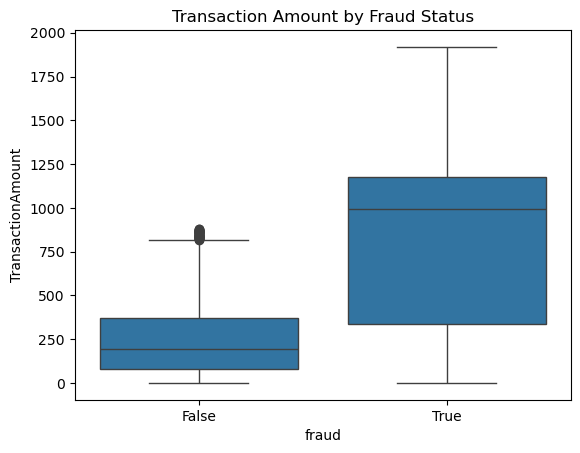

In [15]:
# Conduct bivariate analysis between the Fraud transaction type and Transaction Amount
# Visualises fraudulent transactions
sns.boxplot( x = 'fraud', y = 'TransactionAmount', data = data)
plt.title("Transaction Amount by Fraud Status")
plt.show()
# Confirms fraud rule makes sense

4. Delve deeper into univariate analysis 

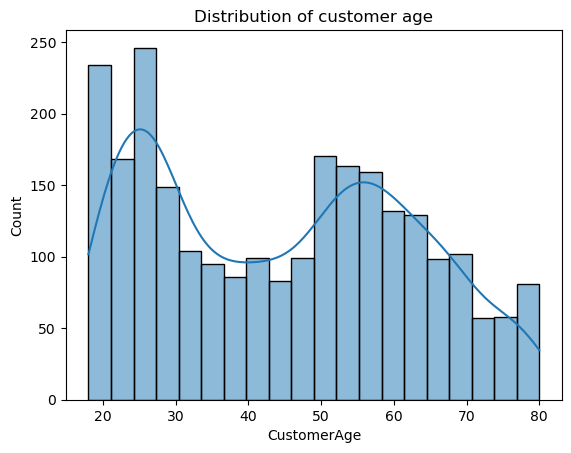

In [16]:
# Customer Age Analysis - check the overall distribution of customer age
sns.histplot(data['CustomerAge'], kde = True, bins = 20)
plt.title("Distribution of customer age")
plt.show()

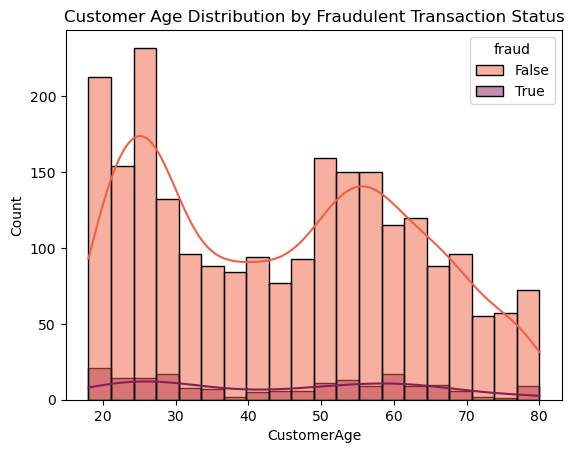

In [17]:
# Compare age distribution across fraudulent vs. non-fraudulent transactions
sns.histplot(data = data, x = 'CustomerAge', hue = 'fraud', kde = True, bins = 20, palette = 'rocket_r')
plt.title("Customer Age Distribution by Fraudulent Transaction Status")
plt.show()

Q. Are online transactions more prone to fraud compared to ATM/branch transactions?

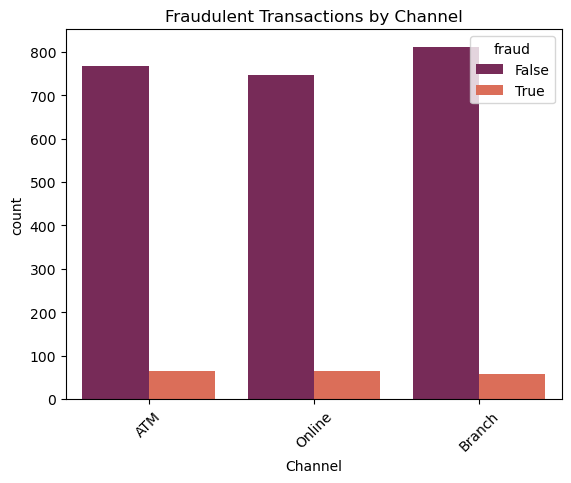

In [18]:
# Fraud by Transaction Channel Analysis 
sns.countplot(x = 'Channel', hue = 'fraud', data = data, palette = 'rocket')
plt.title("Fraudulent Transactions by Channel")
plt.xticks(rotation = 45)
plt.show()

A. The count of fraudulent transactions seems consistent across channels.

Q. Where are do the majority of fraudulent vs. non-fraudulent transactions occur?

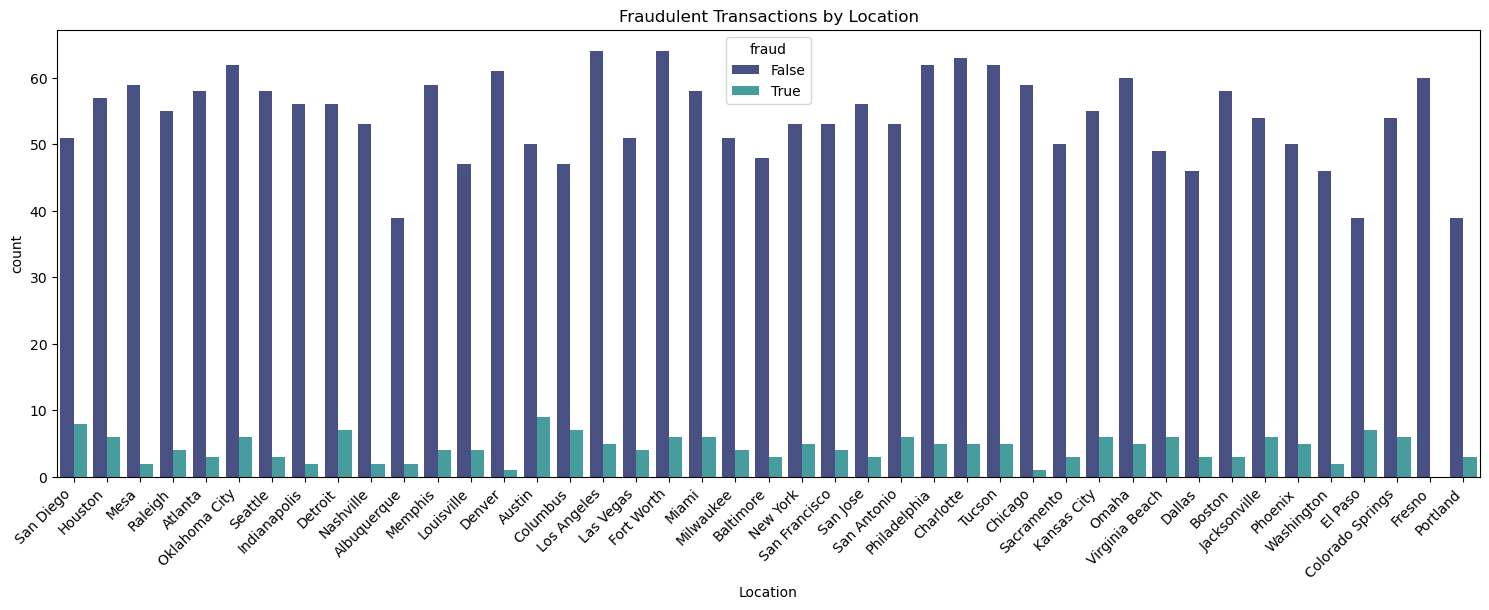

In [19]:
# Fraud by Location Analysis 
plt.figure(figsize=(15, 6)) 
sns.countplot(x = 'Location', hue = 'fraud', data = data, palette = 'mako')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.title("Fraudulent Transactions by Location")
plt.show()

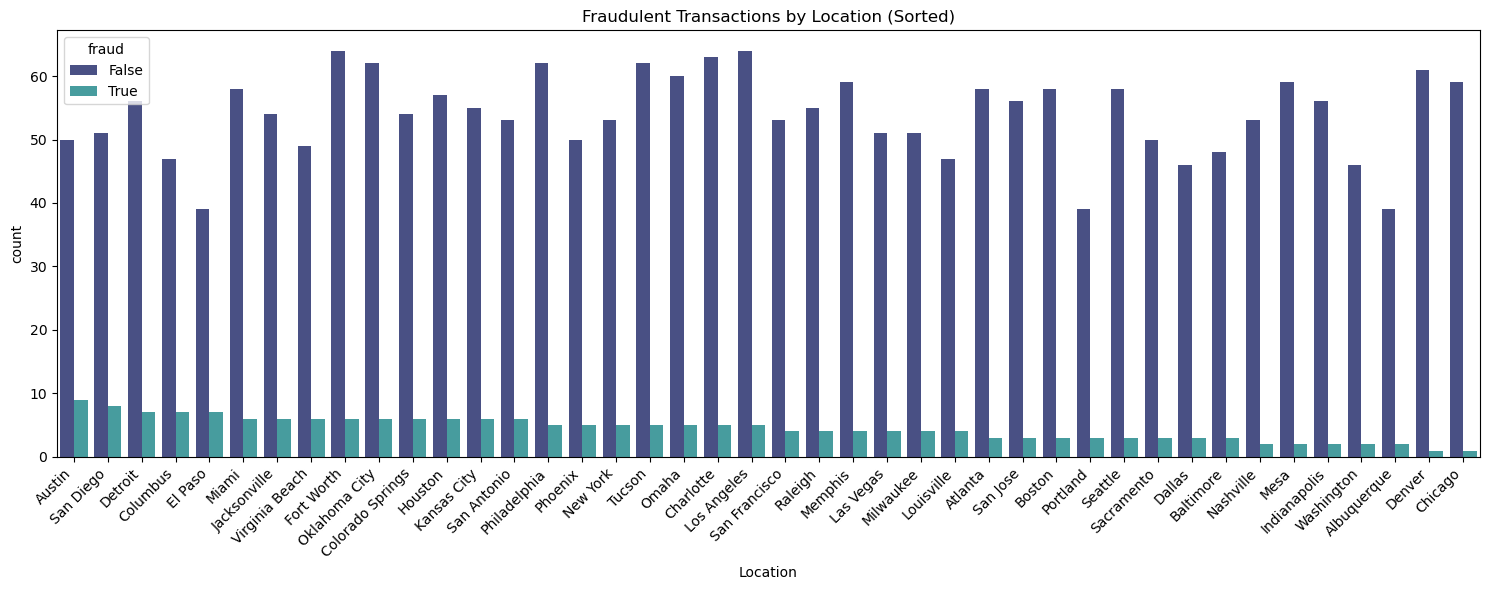

In [20]:
# Sort Location values by the number of fraudulent transactions
sorted_locations = data[data['fraud'] == True]['Location'].value_counts().index
plt.figure(figsize=(15, 6))
sns.countplot(x='Location', hue='fraud', data=data, palette='mako', order=sorted_locations)
plt.title("Fraudulent Transactions by Location (Sorted)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

A. The majority of fraudulent transactions occur in Austin, then San Diego, then Detriot, see graph above for further descending order.

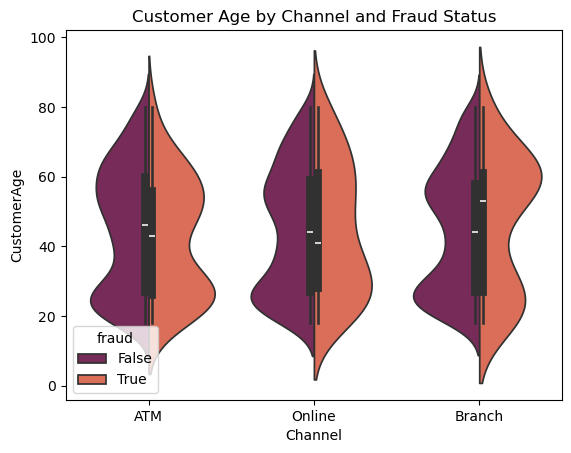

In [24]:
# Customer age by transaction channel and fraud status 
sns.violinplot(x = 'Channel', y = 'CustomerAge', hue = 'fraud', split = True, data = data, palette = 'rocket')
plt.title("Customer Age by Channel and Fraud Status")
plt.show()

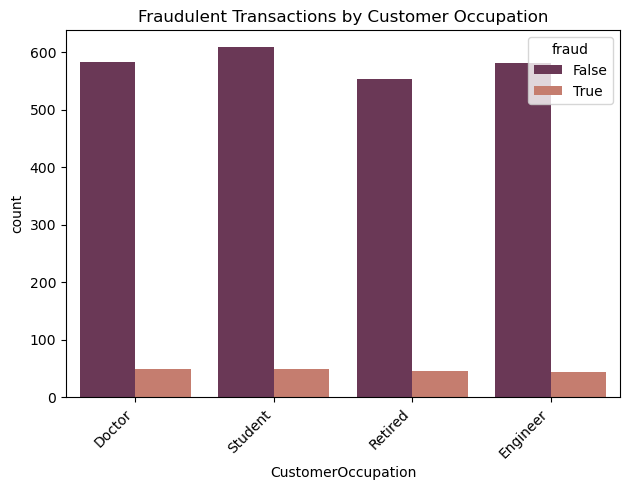

In [36]:
# Fraud by customer occupation
sns.countplot(x = 'CustomerOccupation', hue = 'fraud', data = data, palette = 'rocket', saturation = 0.5)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.title("Fraudulent Transactions by Customer Occupation")
plt.show()